In [388]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 

warnings.filterwarnings('ignore')

In [389]:
df=pd.read_csv('insurance.csv')
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1080,18,male,21.78,2,no,southeast,11884.04858
304,57,female,38.00,2,no,southwest,12646.20700
30,22,male,35.60,0,yes,southwest,35585.57600
38,35,male,36.67,1,yes,northeast,39774.27630
1073,54,female,28.88,2,no,northeast,12096.65120


## ***EDA***

In [390]:
df.shape

(1338, 7)

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [392]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [393]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [394]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [395]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

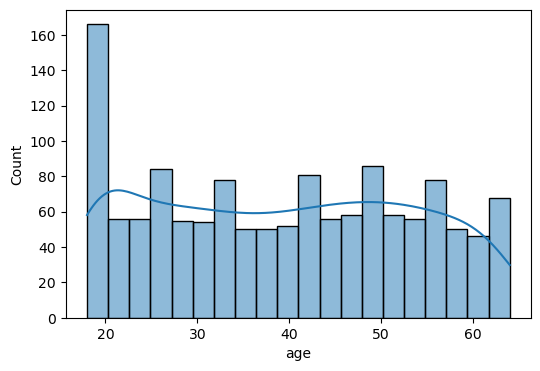

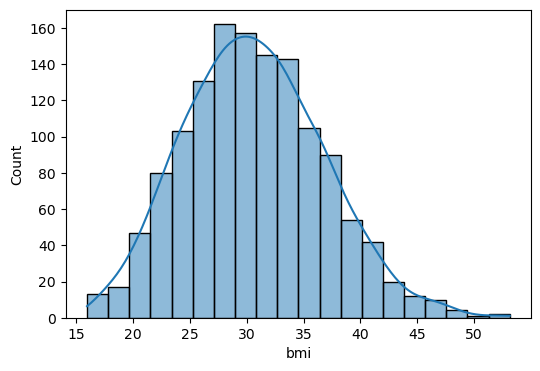

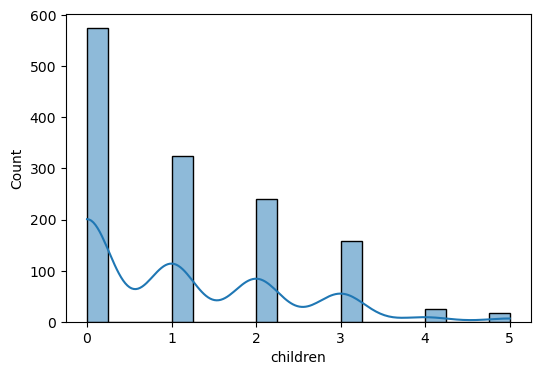

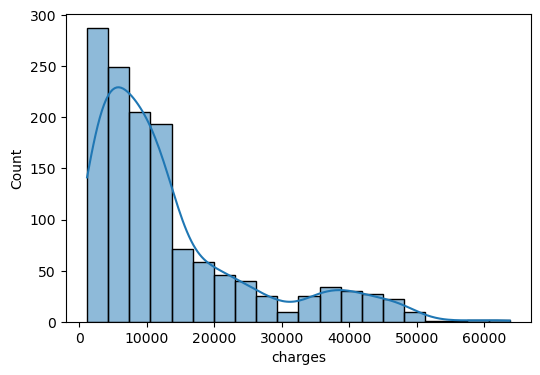

In [396]:
numeric_columns=['age', 'bmi', 'children','charges']
for columns in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[columns],kde=True,bins=20)

<Axes: xlabel='children', ylabel='count'>

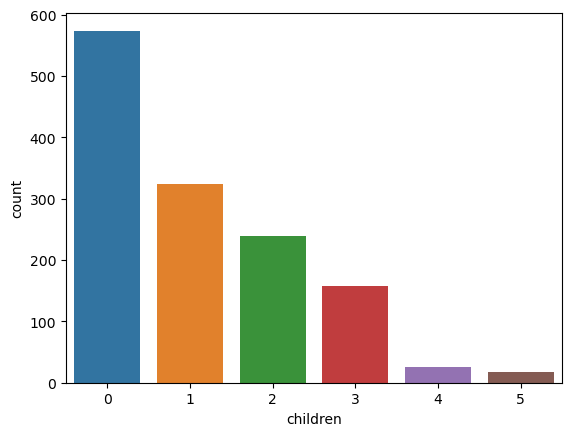

In [397]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

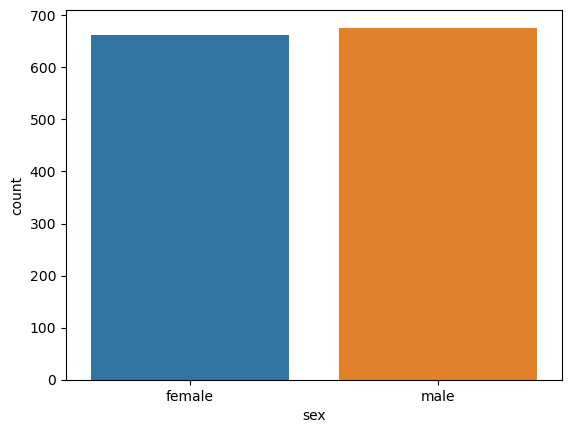

In [398]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

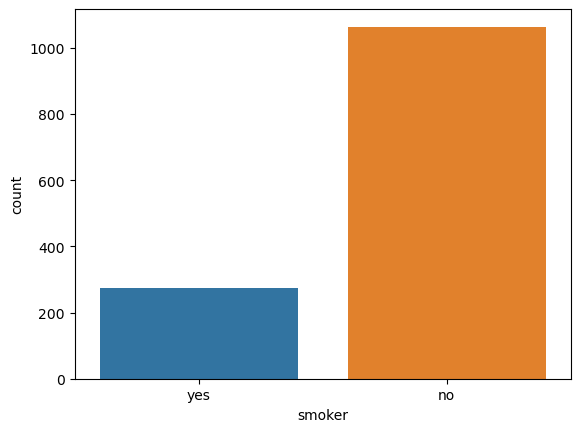

In [399]:
sns.countplot(x=df['smoker'])

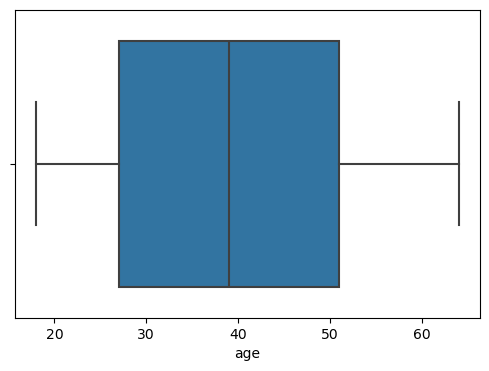

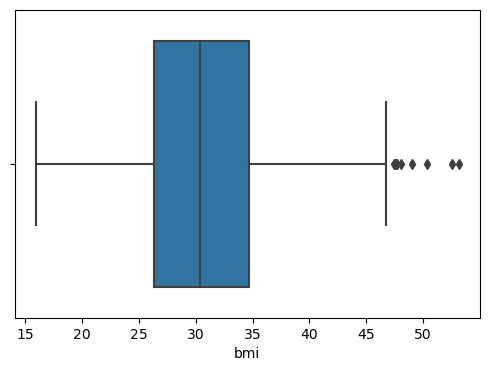

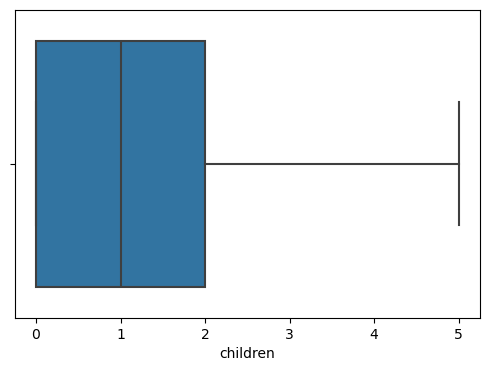

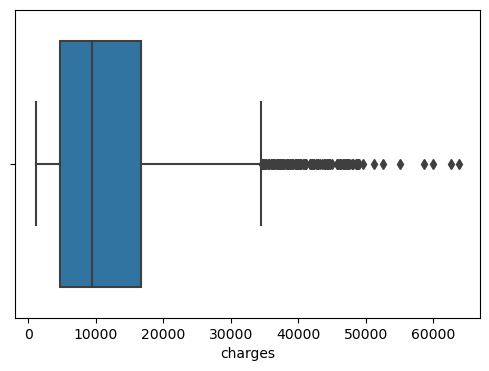

In [400]:
 for columns in numeric_columns:
     plt.figure(figsize=(6,4))
     sns.boxplot(x=df[columns])

<Axes: >

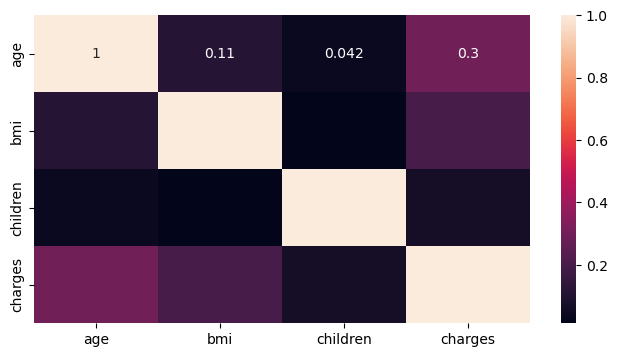

In [401]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True),annot=True)

 ## ***Data Cleaning And Preprocessing***

In [402]:
df_cleaned=df.copy()
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [403]:
df_cleaned.shape

(1338, 7)

In [404]:
df_cleaned.drop_duplicates(inplace=True)

In [405]:
df_cleaned.shape

(1337, 7)

In [406]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [407]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [408]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [409]:
## using 0 ,1 transformation for column sex 
df_cleaned['sex']=df_cleaned['sex'].map({'male':0,'female':1})

In [410]:
df_cleaned.sample(10)

,age,sex,bmi,children,smoker,region,charges
434,31,0,28.595,1,no,northwest,4243.59005
992,50,1,31.600,2,no,southwest,10118.42400
1107,50,1,26.220,2,no,northwest,10493.94580
279,51,1,21.560,1,no,southeast,9855.13140
689,27,0,31.130,1,yes,southeast,34806.46770
351,50,1,25.600,0,no,southwest,8932.08400
24,37,0,28.025,2,no,northwest,6203.90175
158,30,0,35.530,0,yes,southeast,36950.25670
622,49,1,21.300,1,no,southwest,9182.17000
4,32,0,28.880,0,no,northwest,3866.85520


In [411]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [412]:
## using 0 ,1 transformation for column smoker 
df_cleaned['smoker']=df_cleaned['smoker'].map({'yes':1,'no':0})

In [413]:
df_cleaned.sample(3)

,age,sex,bmi,children,smoker,region,charges
1311,33,1,26.695,0,0,northwest,4571.41305
749,28,0,30.875,0,0,northwest,3062.50825
499,62,1,39.200,0,0,southwest,13470.86000


In [414]:
df_cleaned.rename(columns={
    'sex':'is_female',
    'smoker':'is_smoker',
},inplace=True)

In [415]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [416]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [417]:
# using get_dummies  for column region
df_cleaned=pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [418]:
df_cleaned=df_cleaned.astype(int)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


## ***Feature Engineering and Extraction***

<Axes: xlabel='bmi', ylabel='Count'>

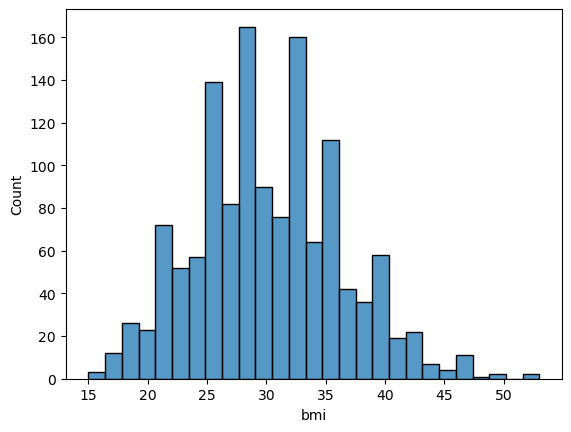

In [419]:
sns.histplot(df_cleaned['bmi'])

In [420]:
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obesity']
)
#float('inf')------> In Python, float('inf') represents positive infinity as a floating-point number.

In [421]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obesity
2,28,0,33,3,0,4449,0,1,0,Obesity
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight


In [422]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['bmi_category'],drop_first=True)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obesity
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False


In [423]:
df_cleaned=df_cleaned.astype(int)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obesity
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


In [424]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight',
       'bmi_category_Obesity'],
      dtype='object')

In [425]:
#StandardScaler is a feature scaling tool in scikit-learn (sklearn.preprocessing.StandardScaler) 
#that standardizes your dataset so that each feature (column) has:

   #Mean = 0
   #Standard Deviation = 1
   #This is also called Z-score normalization.

In [426]:
from sklearn.preprocessing import StandardScaler
cols=['age','bmi','children']
scaler=StandardScaler()
df_cleaned[cols]=scaler.fit_transform(df_cleaned[cols])

In [427]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [428]:
from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obesity'
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obesity,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi_category_Normal,-0.104042


In [429]:

cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obesity'
]

In [430]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obesity,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [431]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast','bmi_category_Obesity']]

In [432]:
final_df.head()

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0


In [433]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
